### Постановка задачи

### Используем несколько функций для просмотра состава данных

In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import pprint
    

def upload_file(local, server, sep=','):
    try:
        df = pd.read_csv(local, sep)
    except:
        df = pd.read_csv(server, sep)
    return df


def printing_general_info(df):
    print('Shape:')
    print(df.shape)
    print('------------------------------------------------------------------------------------')
    print('\nData types:\n')
    print(df.dtypes)
    print('------------------------------------------------------------------------------------')
    print('\nInfo:\n')
    print(df.info())
    print('------------------------------------------------------------------------------------')
    print('\nDescribe:\n')
    print(df.describe())
    print('------------------------------------------------------------------------------------')
    print('\nHead:\n')
    print(df.head())
    print('------------------------------------------------------------------------------------')
    print(f'\nCount of Duplicated rows: {df.duplicated().sum()}')
    print('------------------------------------------------------------------------------------')

    
def find_not_number_fields(df):
    not_number_fields = df.dtypes[~(df.dtypes == 'int64') & ~(df.dtypes == 'float64')].index
    not_number_fields

    print(f'Count of non-numeric variables: {len(not_number_fields)}')

    for i in not_number_fields:
        print('------------------------------------------------------------------------------------')
        print(f'\nVariable: "{i}"\nValue counts:')
        print(df[i].value_counts())



def find_with_null_fields(df, is_chart=True):
    print('Scanning variables with null-values...\n\n')
    
    columns_with_null = {}
    columns_wo_null = []

    for col in df.columns:
        if df[col].isna().sum() > 0:
            columns_with_null[col] = [
                df[col].isna().sum() / len(df),
                df[col].isna().sum(), 
                len(df) - df[col].isna().sum()
            ]
        else:
            columns_wo_null.append(col)
            
            
    res = pd.DataFrame(columns_with_null)
    res = res.T
    res.columns = ['percentage of nulls', 'rows with nulls', 'rows w/o nulls']
    res.sort_values('percentage of nulls', ascending=False, inplace=True)
    
    print(f'Found variables with null: {len(res)}\nIn dataframe total variables: {df.shape[1]}, rows: {df.shape[0]}\n')
    print(res)
    print()
    print(f'Columns w/o nulls: {len(columns_wo_null)} \n{columns_wo_null}')
    
    if is_chart:    
        print('==============================================================================================================')

        print('Analyzing distributions of variables with nulls... \n')

        for col in res.index:
            print(f'Column: {col}')
            nulls = res.loc[col]["rows with nulls"]
            percent = res.loc[col]["percentage of nulls"]
            print('Null values: {:.0f} from total: {}. Percentage: {:.1%}'.format(nulls, len(df), percent))

            if (df[col].dtypes == 'float64') | (df[col].dtypes == 'int64'):
                plt.hist(df[col])
                plt.title(f'{col} distribution of non-null values')
                plt.show()
            else:
                print(df[col].value_counts())
                df[col].value_counts().head(40).plot(kind='bar', title=f'{col} distribution of non-null values', figsize=(30, 10))
                plt.show()

            print('\n------------------------------------------------------------------------------------')
            
            
def dropna_change_vals(df, delete_list, change_dict_vals):
    df.dropna(subset=delete_list, inplace=True)

    for k, v in change_dict_vals.items():
        df[k].fillna(v, inplace=True)
    
        

def change_types(df, change_dict_types):
    print('Before changing types:\n{df.dtypes}')
    for k, v in change_dict_types.items():
        df[k] = df[k].astype(v)
    print('After changing types:\n{df.dtypes}')

    
def study_fields(df, selected_fields):
    for col in selected_fields:
        print('\n Variable "{}": median: {:.1f}   mean: {:.1f}  std: {:.1f}  var: {:.1f}  min: {:.0f}  max: {:.0f}  count: {}'.format(col, 
                                                                   df[col].median(), 
                                                                   df[col].mean(), 
                                                                   df[col].std(),
                                                                   df[col].var(),
                                                                   df[col].min(),
                                                                   df[col].max(),
                                                                   df[col].count()
                                                                  )
             )
        fig, (ax1, ax2) = plt.subplots(1, 2)
        df.boxplot(column=col, vert=False, ax=ax1)
        ax1.set_title(f'Boxplot {col}')

        ax2.hist(df[col], bins=30, range=(df[col].min(), df[col].max()))
        ax2.set_title(f'Hist {col}')

        plt.rcParams["figure.figsize"] = (25, 5)  
        plt.show()
        
        
#

In [462]:
local = 'stock_data_test.csv'
server = 'server.csv'

df = upload_file(local, server)
pd.options.mode.chained_assignment = None

printing_general_info(df)
find_not_number_fields(df)

Shape:
(30664, 5)
------------------------------------------------------------------------------------

Data types:

shop_id            int64
plu                int64
stock_date        object
stock_datetime    object
count              int64
dtype: object
------------------------------------------------------------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30664 entries, 0 to 30663
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   shop_id         30664 non-null  int64 
 1   plu             30664 non-null  int64 
 2   stock_date      30664 non-null  object
 3   stock_datetime  30664 non-null  object
 4   count           30664 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ MB
None
------------------------------------------------------------------------------------

Describe:

            shop_id            plu         count
count  30664.000000   30664.000000

#### Для последующего анализа необходимо изменить тип данных на time

### Описательный анализ количественный метрик по базовым параметрам


 Variable "shop_id": median: 6.0   mean: 6.0  std: 2.6  var: 6.9  min: 1  max: 10  count: 30664


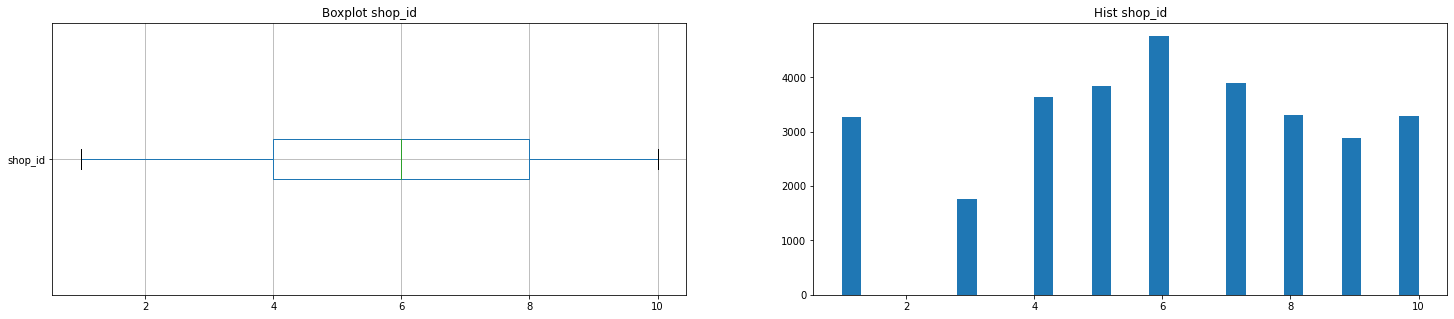


 Variable "plu": median: 705737.0   mean: 603697.1  std: 161078.6  var: 25946301130.4  min: 357596  max: 718714  count: 30664


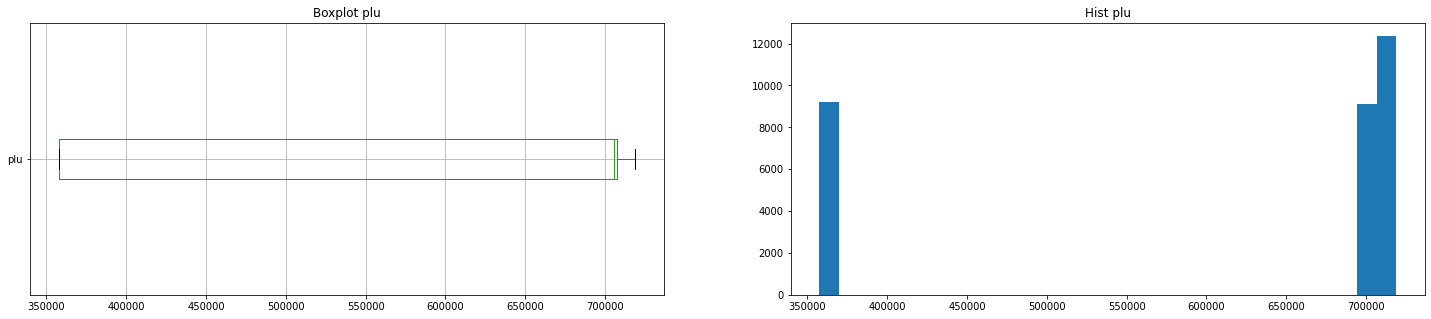


 Variable "count": median: 17.0   mean: 19.6  std: 15.6  var: 244.8  min: -1  max: 91  count: 30664


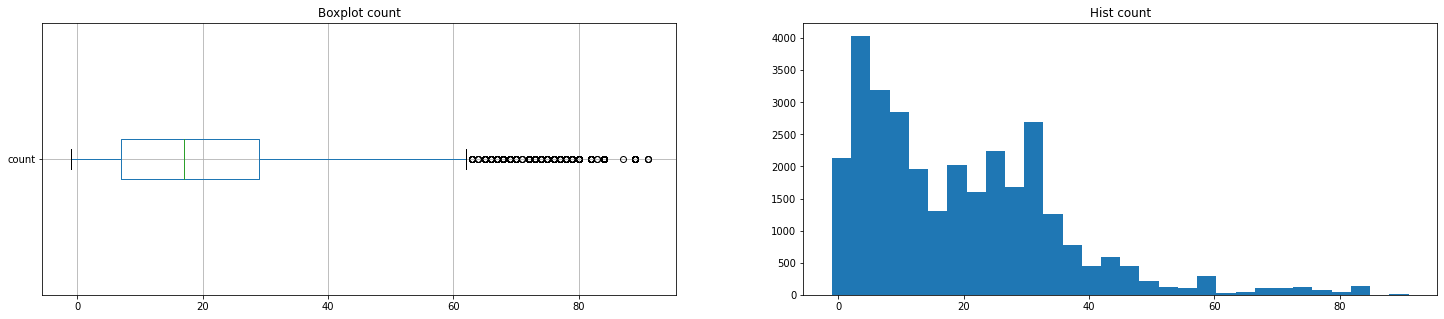

In [463]:
selected_fields = [
    'shop_id',
    'plu',
    'count'
]
study_fields(df, selected_fields)

In [464]:
df['plu'].value_counts()

357596    4638
718714    4600
705737    4591
357601    4554
707310    4158
705566    3530
707458    2694
705416     984
707035     915
Name: plu, dtype: int64

In [467]:
df['shop_id'].value_counts()

6     4761
7     3888
5     3848
4     3641
8     3308
10    3296
1     3262
9     2892
3     1768
Name: shop_id, dtype: int64

### Наблюдения по данным
* Переменные shop_id, plu - номинативные признаки (соот-но, количественный анализ не имеет смысла). 
* В датасете содержатся данные по 9 магазинам и 9 товарам
* Переменная количества товаров на складе count представляет больше интереса
* В датасете содержатся данные за 1 календарный месяц - январь 2020

### Изменяем тип данных на time

In [468]:
df['date'] = pd.to_datetime(df['stock_date'], format='%Y-%m-%d')
df['datetime'] = pd.to_datetime(df['stock_datetime'], format='%Y-%m-%d %H:%M:%S')
df.head()

,shop_id,plu,stock_date,stock_datetime,count,date,datetime
0,1,705566,2020-01-03,2020-01-03 12:00:50,17,2020-01-03,2020-01-03 12:00:50
1,8,705737,2020-01-12,2020-01-12 09:00:42,7,2020-01-12,2020-01-12 09:00:42
2,6,707458,2020-01-05,2020-01-05 17:00:10,3,2020-01-05,2020-01-05 17:00:10
3,8,718714,2020-01-21,2020-01-21 22:00:32,4,2020-01-21,2020-01-21 22:00:32
4,8,707310,2020-01-20,2020-01-20 12:00:38,22,2020-01-20,2020-01-20 12:00:38


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30664 entries, 0 to 30663
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   shop_id         30664 non-null  int64         
 1   plu             30664 non-null  int64         
 2   stock_date      30664 non-null  object        
 3   stock_datetime  30664 non-null  object        
 4   count           30664 non-null  int64         
 5   date            30664 non-null  datetime64[ns]
 6   datetime        30664 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 1.6+ MB


In [470]:
df['hour'] = df['datetime'].dt.hour
df.head()

,shop_id,plu,stock_date,stock_datetime,count,date,datetime,hour
0,1,705566,2020-01-03,2020-01-03 12:00:50,17,2020-01-03,2020-01-03 12:00:50,12
1,8,705737,2020-01-12,2020-01-12 09:00:42,7,2020-01-12,2020-01-12 09:00:42,9
2,6,707458,2020-01-05,2020-01-05 17:00:10,3,2020-01-05,2020-01-05 17:00:10,17
3,8,718714,2020-01-21,2020-01-21 22:00:32,4,2020-01-21,2020-01-21 22:00:32,22
4,8,707310,2020-01-20,2020-01-20 12:00:38,22,2020-01-20,2020-01-20 12:00:38,12


<AxesSubplot:>

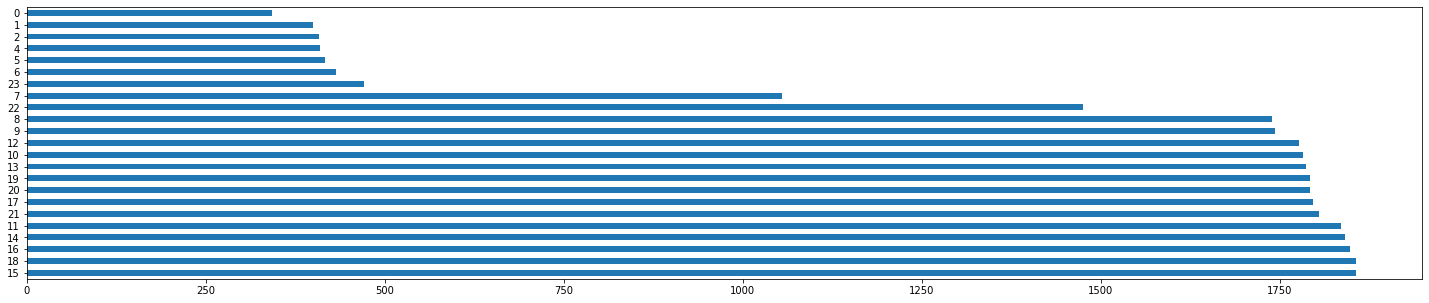

In [471]:
df['hour'].value_counts().plot(kind='barh')

### Заменяем отрицательные значения на 0

In [472]:
def replace_negative(row):
    if row['count'] < 0:
        return 0
    return row['count']

df['count'] = df.apply(replace_negative, axis=1)
df[df['count'] < 0]

,shop_id,plu,stock_date,stock_datetime,count,date,datetime,hour


### Работа с данными

In [473]:
len(df[df['count'] == 0]) / len(df)

0.0028045917036264023

In [474]:
len(df[df['count'] == 0])

86

###  Всего в данных наблюдается 86 строк с 0 значениями остатков товара (2.8% строк)

In [475]:
df[df['count'] == 0]

,shop_id,plu,stock_date,stock_datetime,count,date,datetime,hour
380,6,705566,2020-01-31,2020-01-30 23:00:37,0,2020-01-31,2020-01-30 23:00:37,23
614,10,718714,2020-01-27,2020-01-27 14:00:16,0,2020-01-27,2020-01-27 14:00:16,14
1080,10,718714,2020-01-28,2020-01-28 00:00:43,0,2020-01-28,2020-01-28 00:00:43,0
1408,6,705566,2020-01-29,2020-01-29 16:01:09,0,2020-01-29,2020-01-29 16:01:09,16
2341,6,705566,2020-01-29,2020-01-29 00:00:19,0,2020-01-29,2020-01-29 00:00:19,0
...,...,...,...,...,...,...,...,...
28548,10,718714,2020-01-27,2020-01-27 13:00:29,0,2020-01-27,2020-01-27 13:00:29,13
29673,6,705566,2020-01-29,2020-01-29 11:00:34,0,2020-01-29,2020-01-29 11:00:34,11
29999,6,705566,2020-01-30,2020-01-30 11:01:06,0,2020-01-30,2020-01-30 11:01:06,11
30011,6,705566,2020-01-30,2020-01-30 06:00:40,0,2020-01-30,2020-01-30 06:00:40,6


Сортируем данные по магазину, товару и времени

In [476]:
df.sort_values(['shop_id', 'plu', 'datetime'], inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,shop_id,plu,stock_date,stock_datetime,count,date,datetime,hour
0,1,357596,2020-01-01,2020-01-01 11:00:51,21,2020-01-01,2020-01-01 11:00:51,11
1,1,357596,2020-01-01,2020-01-01 14:00:09,21,2020-01-01,2020-01-01 14:00:09,14
2,1,357596,2020-01-01,2020-01-01 15:00:10,21,2020-01-01,2020-01-01 15:00:10,15
3,1,357596,2020-01-01,2020-01-01 16:00:33,21,2020-01-01,2020-01-01 16:00:33,16
4,1,357596,2020-01-01,2020-01-01 17:00:24,21,2020-01-01,2020-01-01 17:00:24,17


#### Добавляем новые поля - смещения на 1 строку вниз и вверх (lag, lead  - sql) для времени и количества остатков

In [477]:
df['lead'] = df.groupby(['shop_id', 'plu'])['datetime'].shift(-1)
df['count_lead'] = df.loc[:, 'count'].shift(-1)

df['lag'] = df.groupby(['shop_id', 'plu'])['datetime'].shift(1)
df['count_lag'] = df.loc[:, 'count'].shift(1)

df['delta_time'] = df['lead'] - df['datetime']

df.head()

,shop_id,plu,stock_date,stock_datetime,count,date,datetime,hour,lead,count_lead,lag,count_lag,delta_time
0,1,357596,2020-01-01,2020-01-01 11:00:51,21,2020-01-01,2020-01-01 11:00:51,11,2020-01-01 14:00:09,21.0,NaT,NaN,0 days 02:59:18
1,1,357596,2020-01-01,2020-01-01 14:00:09,21,2020-01-01,2020-01-01 14:00:09,14,2020-01-01 15:00:10,21.0,2020-01-01 11:00:51,21.0,0 days 01:00:01
2,1,357596,2020-01-01,2020-01-01 15:00:10,21,2020-01-01,2020-01-01 15:00:10,15,2020-01-01 16:00:33,21.0,2020-01-01 14:00:09,21.0,0 days 01:00:23
3,1,357596,2020-01-01,2020-01-01 16:00:33,21,2020-01-01,2020-01-01 16:00:33,16,2020-01-01 17:00:24,21.0,2020-01-01 15:00:10,21.0,0 days 00:59:51
4,1,357596,2020-01-01,2020-01-01 17:00:24,21,2020-01-01,2020-01-01 17:00:24,17,2020-01-01 18:00:20,21.0,2020-01-01 16:00:33,21.0,0 days 00:59:56


#### Отбираем строки с нулевыми запасами для анализа

In [478]:
temp = df[df['count'] == 0]
temp

,shop_id,plu,stock_date,stock_datetime,count,date,datetime,hour,lead,count_lead,lag,count_lag,delta_time
13549,6,357601,2020-01-17,2020-01-17 09:00:18,0,2020-01-17,2020-01-17 09:00:18,9,2020-01-17 10:00:26,35.0,2020-01-17 08:00:45,36.0,0 days 01:00:08
14491,6,705566,2020-01-29,2020-01-28 23:00:42,0,2020-01-29,2020-01-28 23:00:42,23,2020-01-29 00:00:19,0.0,2020-01-28 22:00:11,2.0,0 days 00:59:37
14492,6,705566,2020-01-29,2020-01-29 00:00:19,0,2020-01-29,2020-01-29 00:00:19,0,2020-01-29 01:00:08,0.0,2020-01-28 23:00:42,0.0,0 days 00:59:49
14493,6,705566,2020-01-29,2020-01-29 01:00:08,0,2020-01-29,2020-01-29 01:00:08,1,2020-01-29 02:00:36,0.0,2020-01-29 00:00:19,0.0,0 days 01:00:28
14494,6,705566,2020-01-29,2020-01-29 02:00:36,0,2020-01-29,2020-01-29 02:00:36,2,2020-01-29 04:00:29,0.0,2020-01-29 01:00:08,0.0,0 days 01:59:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30576,10,718714,2020-01-28,2020-01-28 00:00:43,0,2020-01-28,2020-01-28 00:00:43,0,2020-01-28 01:00:13,0.0,2020-01-27 22:00:20,0.0,0 days 00:59:30
30577,10,718714,2020-01-28,2020-01-28 01:00:13,0,2020-01-28,2020-01-28 01:00:13,1,2020-01-28 02:01:00,0.0,2020-01-28 00:00:43,0.0,0 days 01:00:47
30578,10,718714,2020-01-28,2020-01-28 02:01:00,0,2020-01-28,2020-01-28 02:01:00,2,2020-01-28 04:00:52,0.0,2020-01-28 01:00:13,0.0,0 days 01:59:52
30579,10,718714,2020-01-28,2020-01-28 04:00:52,0,2020-01-28,2020-01-28 04:00:52,4,2020-01-28 05:00:54,0.0,2020-01-28 02:01:00,0.0,0 days 01:00:02


#### На отфильтрованных данных - только тех строках, в которых запасы равны нулю в момент замера - вычисляем, являются ли строки частями последовательности (более крупного периода)

In [479]:
temp['is_contin'] = (temp['lead'] == temp['datetime'].shift(-1))

In [480]:
temp.head()

,shop_id,plu,stock_date,stock_datetime,count,date,datetime,hour,lead,count_lead,lag,count_lag,delta_time,is_contin
13549,6,357601,2020-01-17,2020-01-17 09:00:18,0,2020-01-17,2020-01-17 09:00:18,9,2020-01-17 10:00:26,35.0,2020-01-17 08:00:45,36.0,0 days 01:00:08,False
14491,6,705566,2020-01-29,2020-01-28 23:00:42,0,2020-01-29,2020-01-28 23:00:42,23,2020-01-29 00:00:19,0.0,2020-01-28 22:00:11,2.0,0 days 00:59:37,True
14492,6,705566,2020-01-29,2020-01-29 00:00:19,0,2020-01-29,2020-01-29 00:00:19,0,2020-01-29 01:00:08,0.0,2020-01-28 23:00:42,0.0,0 days 00:59:49,True
14493,6,705566,2020-01-29,2020-01-29 01:00:08,0,2020-01-29,2020-01-29 01:00:08,1,2020-01-29 02:00:36,0.0,2020-01-29 00:00:19,0.0,0 days 01:00:28,True
14494,6,705566,2020-01-29,2020-01-29 02:00:36,0,2020-01-29,2020-01-29 02:00:36,2,2020-01-29 04:00:29,0.0,2020-01-29 01:00:08,0.0,0 days 01:59:53,True


#### Отбираем строки - начало и конец непрерывных интервалов с отсутствием товаров в магазинах

In [481]:
res = temp.query('count_lag != 0 or is_contin == False')
res

,shop_id,plu,stock_date,stock_datetime,count,date,datetime,hour,lead,count_lead,lag,count_lag,delta_time,is_contin
13549,6,357601,2020-01-17,2020-01-17 09:00:18,0,2020-01-17,2020-01-17 09:00:18,9,2020-01-17 10:00:26,35.0,2020-01-17 08:00:45,36.0,0 days 01:00:08,False
14491,6,705566,2020-01-29,2020-01-28 23:00:42,0,2020-01-29,2020-01-28 23:00:42,23,2020-01-29 00:00:19,0.0,2020-01-28 22:00:11,2.0,0 days 00:59:37,True
14559,6,705566,2020-01-31,2020-01-31 22:00:52,0,2020-01-31,2020-01-31 22:00:52,22,NaT,15.0,2020-01-31 21:00:50,0.0,NaT,False
30565,10,718714,2020-01-27,2020-01-27 12:00:44,0,2020-01-27,2020-01-27 12:00:44,12,2020-01-27 13:00:29,0.0,2020-01-27 11:00:19,1.0,0 days 00:59:45,True
30580,10,718714,2020-01-28,2020-01-28 05:00:54,0,2020-01-28,2020-01-28 05:00:54,5,2020-01-28 06:00:26,5.0,2020-01-28 04:00:52,0.0,0 days 00:59:32,False


In [484]:
res['delta_time'] = res['delta_time'].astype(str)

#### В качестве допущения принимается, что если последний замер с нулевым запасом является последним в течение дня и по товару нет следующей отметки с восполнением заказа, то в общее время отсутствия товара добавляются часы до конца данного астрономического дня

In [485]:
def replace_nat(raw):
    if raw['delta_time'] == 'NaT':
        return pd.to_datetime(raw['stock_date'] + ' 23:59:59', format='%Y-%m-%d %H:%M:%S')
    else:
        return raw['lead']

res['lead'] = res.apply(replace_nat, axis=1)
res

,shop_id,plu,stock_date,stock_datetime,count,date,datetime,hour,lead,count_lead,lag,count_lag,delta_time,is_contin
13549,6,357601,2020-01-17,2020-01-17 09:00:18,0,2020-01-17,2020-01-17 09:00:18,9,2020-01-17 10:00:26,35.0,2020-01-17 08:00:45,36.0,0 days 01:00:08,False
14491,6,705566,2020-01-29,2020-01-28 23:00:42,0,2020-01-29,2020-01-28 23:00:42,23,2020-01-29 00:00:19,0.0,2020-01-28 22:00:11,2.0,0 days 00:59:37,True
14559,6,705566,2020-01-31,2020-01-31 22:00:52,0,2020-01-31,2020-01-31 22:00:52,22,2020-01-31 23:59:59,15.0,2020-01-31 21:00:50,0.0,NaT,False
30565,10,718714,2020-01-27,2020-01-27 12:00:44,0,2020-01-27,2020-01-27 12:00:44,12,2020-01-27 13:00:29,0.0,2020-01-27 11:00:19,1.0,0 days 00:59:45,True
30580,10,718714,2020-01-28,2020-01-28 05:00:54,0,2020-01-28,2020-01-28 05:00:54,5,2020-01-28 06:00:26,5.0,2020-01-28 04:00:52,0.0,0 days 00:59:32,False


In [486]:
def find_intervals(raw):
    if raw['count_lag'] != 0 and raw['count_lead'] == 0:
        return 'begin'
    elif raw['count_lag'] == 0 and raw['count_lead'] != 0:
        return 'end'
    elif raw['count_lag'] != 0 and raw['count_lead'] != 0:
        return 'whole'
    else:
        return 'inside_interval'
    
res['intervals'] = res.apply(find_intervals, axis=1)

res

,shop_id,plu,stock_date,stock_datetime,count,date,datetime,hour,lead,count_lead,lag,count_lag,delta_time,is_contin,intervals
13549,6,357601,2020-01-17,2020-01-17 09:00:18,0,2020-01-17,2020-01-17 09:00:18,9,2020-01-17 10:00:26,35.0,2020-01-17 08:00:45,36.0,0 days 01:00:08,False,whole
14491,6,705566,2020-01-29,2020-01-28 23:00:42,0,2020-01-29,2020-01-28 23:00:42,23,2020-01-29 00:00:19,0.0,2020-01-28 22:00:11,2.0,0 days 00:59:37,True,begin
14559,6,705566,2020-01-31,2020-01-31 22:00:52,0,2020-01-31,2020-01-31 22:00:52,22,2020-01-31 23:59:59,15.0,2020-01-31 21:00:50,0.0,NaT,False,end
30565,10,718714,2020-01-27,2020-01-27 12:00:44,0,2020-01-27,2020-01-27 12:00:44,12,2020-01-27 13:00:29,0.0,2020-01-27 11:00:19,1.0,0 days 00:59:45,True,begin
30580,10,718714,2020-01-28,2020-01-28 05:00:54,0,2020-01-28,2020-01-28 05:00:54,5,2020-01-28 06:00:26,5.0,2020-01-28 04:00:52,0.0,0 days 00:59:32,False,end


#### Схлопываем итоговый датасет до количества таких периодов и вычисляем разницу во времени между начаолм и концом периода

In [487]:
res['interval_end'] = res['lead'].shift(-1)

def replace_whole(raw):
    if raw['intervals'] == 'whole':
        return raw['lead']
    else:
        return raw['interval_end']
    
res['interval_end'] = res.apply(replace_whole, axis=1)

res['interval_length'] = res['interval_end'] - res['datetime']
res[res['intervals'] != 'end']

,shop_id,plu,stock_date,stock_datetime,count,date,datetime,hour,lead,count_lead,lag,count_lag,delta_time,is_contin,intervals,interval_end,interval_length
13549,6,357601,2020-01-17,2020-01-17 09:00:18,0,2020-01-17,2020-01-17 09:00:18,9,2020-01-17 10:00:26,35.0,2020-01-17 08:00:45,36.0,0 days 01:00:08,False,whole,2020-01-17 10:00:26,0 days 01:00:08
14491,6,705566,2020-01-29,2020-01-28 23:00:42,0,2020-01-29,2020-01-28 23:00:42,23,2020-01-29 00:00:19,0.0,2020-01-28 22:00:11,2.0,0 days 00:59:37,True,begin,2020-01-31 23:59:59,3 days 00:59:17
30565,10,718714,2020-01-27,2020-01-27 12:00:44,0,2020-01-27,2020-01-27 12:00:44,12,2020-01-27 13:00:29,0.0,2020-01-27 11:00:19,1.0,0 days 00:59:45,True,begin,2020-01-28 06:00:26,0 days 17:59:42


#### Создаем файл для сохранения, переименовываем названия столбцов для читаемости

In [499]:
to_file = res[res['intervals'] != 'end'][['shop_id', 'plu', 'datetime', 'interval_end', 'interval_length']]
columns_list = ['shop_id', 'plu', 'start_of_interval_abscence', 'end_of_interval_abscence', 'interval_length']
to_file.columns = columns_list
to_file

,shop_id,plu,start_of_interval_abscence,end_of_interval_abscence,interval_length
13549,6,357601,2020-01-17 09:00:18,2020-01-17 10:00:26,0 days 01:00:08
14491,6,705566,2020-01-28 23:00:42,2020-01-31 23:59:59,3 days 00:59:17
30565,10,718714,2020-01-27 12:00:44,2020-01-28 06:00:26,0 days 17:59:42


In [500]:
to_file.to_csv('task_02.csv')

In [502]:
temp_to_file = temp[['shop_id', 'plu', 'datetime', 'lead', 'delta_time']]

temp_cols = ['shop_id', 'plu', 'start_of_interval_abscence', 'end_of_interval_abscence', 'interval_length']
temp_to_file.columns = temp_cols
temp_to_file.to_csv('task_02_all_hours_intervals.csv')

### Выводы

В данных наблюдаются 2 типа отсутствия товаров 

1) несмердженные строки по часам, ситуация когда в строке, следующей после строки с нулевым запасом (в рамках одного магазина и одного и того же продукта) появляется ненулевая запись (означает, что в следующий замер товар появился в магазине, и, следовательно, можно использовать разницу по времени со следующей строкой в таблице)


2) интервалы отсутствия товара на складе на протяжении ряда постоянных замеров. Для определения границ таких интервалов проивзодится группировка


Основной результат в схлопнутом виде - объект to_file и файл 'task_02.csv'
Вспомогательный файл в несхлопнутом виде - отдельный пустой интервал оставлен отдельной строкой - объект temp_to_file и файл 'task_02_all_hours_intervals.csv'